In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Loading the dataset

In [2]:
df=pd.read_csv('HousingData.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Feature variables and target

In [3]:
# Removing rows with missing values
df=df.dropna()
# Features and target

X=df.drop("MEDV",axis=1)

y=df["MEDV"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


Linear Regression Model

In [4]:
# Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Predicting and Evaluating

In [5]:
# Predictions
y_pred=model.predict(X_test)

#Evaluating

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 31.45404766495097
R² Score: 0.627084994167318


Visualization 

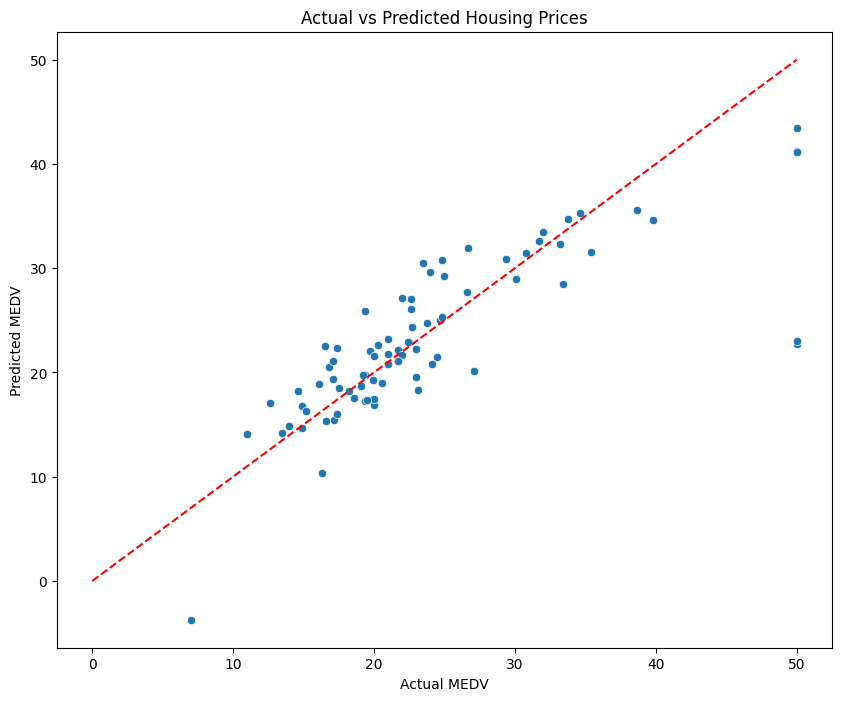

In [ ]:
# Visualizing
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([0, 50], [0, 50], '--r')
plt.show()
